VEHICLE DAMAGE DETECTION USING CNN FINAL

In [ ]:
!pip install tensorflow

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload a zip file with the dataset


Saving datasets.zip to datasets.zip


In [ ]:
!unzip datasets.zip


Archive:  datasets.zip
   creating: datasets/
   creating: datasets/train/
   creating: datasets/train/damaged/
  inflating: datasets/train/damaged/0001.JPEG  
  inflating: datasets/train/damaged/0002.JPEG  
  inflating: datasets/train/damaged/0003.JPEG  
  inflating: datasets/train/damaged/0004.JPEG  
  inflating: datasets/train/damaged/0005.JPEG  
  inflating: datasets/train/damaged/0006.JPEG  
  inflating: datasets/train/damaged/0007.JPEG  
  inflating: datasets/train/damaged/0008.JPEG  
  inflating: datasets/train/damaged/0009.JPEG  
  inflating: datasets/train/damaged/0010.JPEG  
  inflating: datasets/train/damaged/0011.JPEG  
  inflating: datasets/train/damaged/0012.JPEG  
  inflating: datasets/train/damaged/0013.JPEG  
  inflating: datasets/train/damaged/0014.JPEG  
  inflating: datasets/train/damaged/0015.JPEG  
  inflating: datasets/train/damaged/0016.JPEG  
  inflating: datasets/train/damaged/0017.JPEG  
  inflating: datasets/train/damaged/0018.JPEG  
  inflating: datasets/tr

In [ ]:
import os
os.listdir("/content")


['.config',
 '0009.JPEG',
 'datasets.zip',
 'dl_project_new.ipynb',
 'datasets',
 'sample_data']

In [ ]:
os.listdir("/content/datasets")


['train', 'validate']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "/content/datasets/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

val_gen = val_datagen.flow_from_directory(
    "/content/datasets/validate",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 64s 818ms/step - accuracy: 0.7886 - loss: 0.4491 - val_accuracy: 0.9239 - val_loss: 0.2329
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 413ms/step - accuracy: 0.9004 - loss: 0.2674 - val_accuracy: 0.9065 - val_loss: 0.2290
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 413ms/step - accuracy: 0.9056 - loss: 0.2276 - val_accuracy: 0.9000 - val_loss: 0.2325
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 410ms/step - accuracy: 0.9112 - loss: 0.2144 - val_accuracy: 0.8739 - val_loss: 0.3146
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 417ms/step - accuracy: 0.9289 - loss: 0.1854 - val_accuracy: 0.8478 - val_loss: 0.3652
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 410ms/step - accuracy: 0.9049 - loss: 0.2095 - val_accuracy: 0.8543 - val_loss: 0.3358
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 409ms/step - accuracy: 0.9410 - loss: 0.1528 - val_accuracy: 0.9130 - val_loss: 0.2189
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 412ms/step - accuracy: 0.9343 - loss: 0.1667 - val_accu

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import drive
from tensorflow.keras.models import load_model

drive.mount('/content/drive')

model = load_model("/content/drive/MyDrive/car_damage_model.h5")
print("Model loaded ✅")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded ✅


Saving 0022.jpg to 0022.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


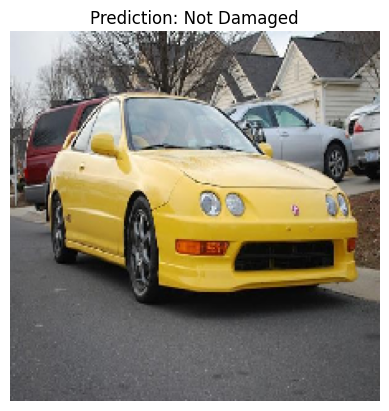

In [3]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
img_name = list(uploaded.keys())[0]

# Load and preprocess image
img = image.load_img(img_name, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)[0][0]
result = "Not Damaged" if pred > 0.5 else "Damaged"

# Show image + result
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {result}")
plt.show()


In [6]:
!mkdir /content/validate


mkdir: cannot create directory ‘/content/validate’: File exists


In [9]:
!ls /content/validate
